In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sv

In [ ]:
df = pd.read_csv('./data/Life Expectancy Data.csv')
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [1]:
report = sv.analyze(df)
report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [6]:
columns_to_process = [col for col in df.columns]
for col in columns_to_process:
  check = df.groupby('Country')[col].apply(lambda x: x.isnull().all())

  if len(check[check == True]) == 0:
    continue
  print(f"Groups where all values of '{col}' are NaN:")
  print(check[check == True])

Groups where all values of 'Life expectancy ' are NaN:
Country
Cook Islands             True
Dominica                 True
Marshall Islands         True
Monaco                   True
Nauru                    True
Niue                     True
Palau                    True
Saint Kitts and Nevis    True
San Marino               True
Tuvalu                   True
Name: Life expectancy , dtype: bool
Groups where all values of 'Adult Mortality' are NaN:
Country
Cook Islands             True
Dominica                 True
Marshall Islands         True
Monaco                   True
Nauru                    True
Niue                     True
Palau                    True
Saint Kitts and Nevis    True
San Marino               True
Tuvalu                   True
Name: Adult Mortality, dtype: bool
Groups where all values of 'Alcohol' are NaN:
Country
Palau          True
South Sudan    True
Name: Alcohol, dtype: bool
Groups where all values of 'Hepatitis B' are NaN:
Country
Denmark                  

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [8]:
df.dropna(subset=['Life expectancy '], inplace=True)

In [9]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                            193
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                32
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                443
Population                         644
 thinness  1-19 years               32
 thinness 5-9 years                 32
Income composition of resources    160
Schooling                          160
dtype: int64

In [10]:
df.shape[0]

2928

# Exploring Data

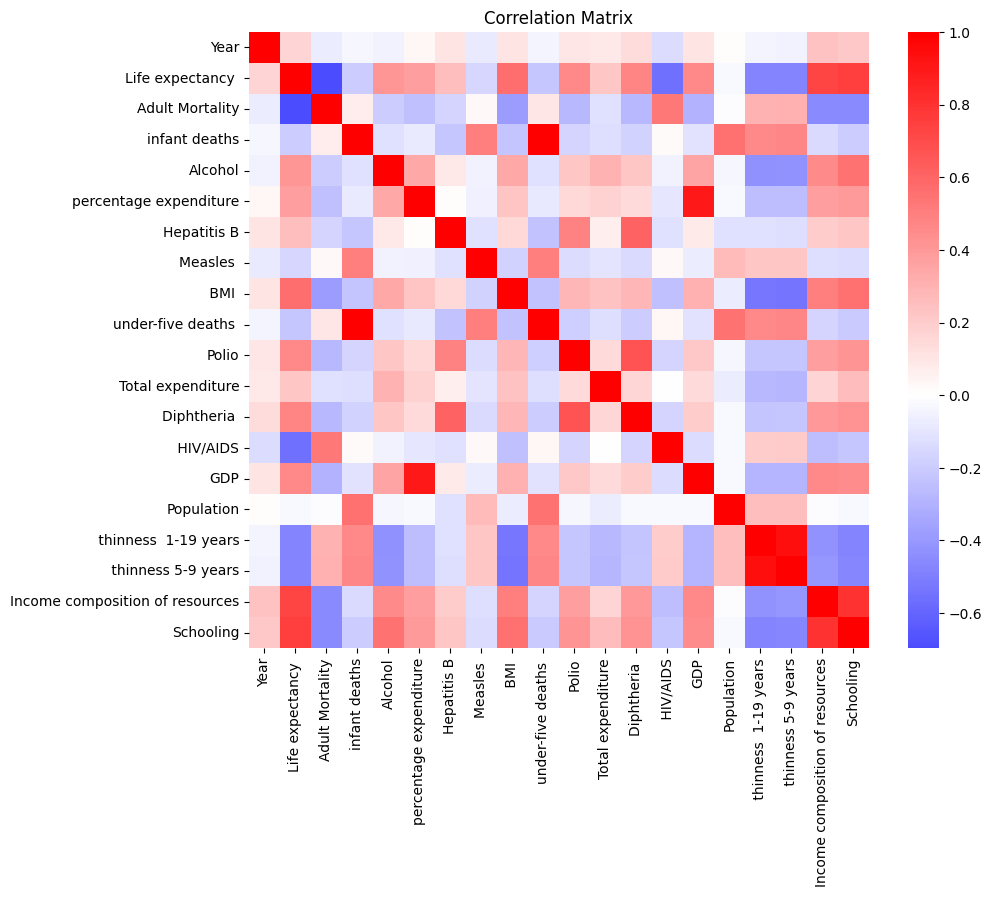

In [11]:
numerical_features = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr_matrix = numerical_features.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap="bwr", center=0)
plt.title("Correlation Matrix")
plt.show()


In [12]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [13]:
df = df.drop(columns=['Polio', ' HIV/AIDS', 'Diphtheria ', 'under-five deaths ', 'Measles ', 'Hepatitis B', 'infant deaths', 'Adult Mortality'])

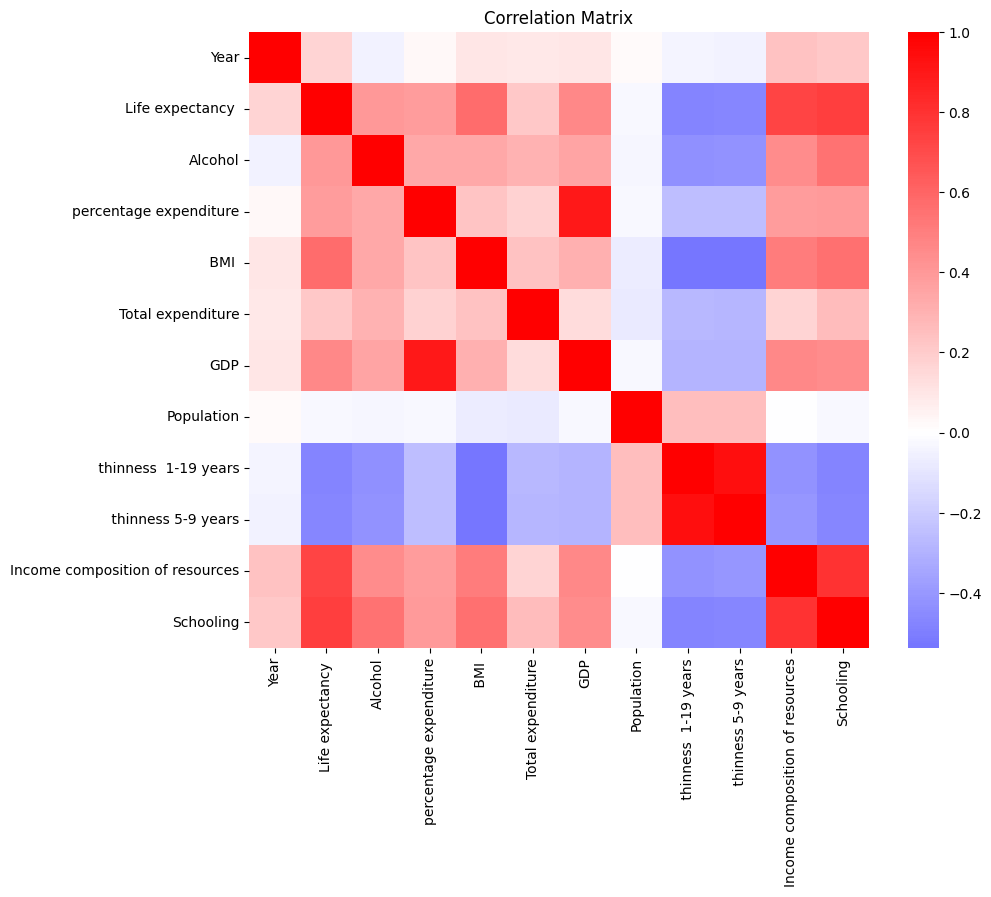

In [14]:
numerical_features = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr_matrix = numerical_features.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap="bwr", center=0)
plt.title("Correlation Matrix")
plt.show()


In [15]:
df['Country'].nunique()

183

In [16]:
df.head()

,Country,Year,Status,Life expectancy,Alcohol,percentage expenditure,BMI,Total expenditure,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,0.01,71.279624,19.1,8.16,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,0.01,73.523582,18.6,8.18,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,0.01,73.219243,18.1,8.13,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,0.01,78.184215,17.6,8.52,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,0.01,7.097109,17.2,7.87,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2928 entries, 0 to 2937
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2928 non-null   object 
 1   Year                             2928 non-null   int64  
 2   Status                           2928 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Alcohol                          2735 non-null   float64
 5   percentage expenditure           2928 non-null   float64
 6    BMI                             2896 non-null   float64
 7   Total expenditure                2702 non-null   float64
 8   GDP                              2485 non-null   float64
 9   Population                       2284 non-null   float64
 10   thinness  1-19 years            2896 non-null   float64
 11   thinness 5-9 years              2896 non-null   float64
 12  Income composition of res

In [18]:
# Set plot and seaborn settings for prettier plots
plt.style.use('ggplot')
plt.rcParams.update({
    'figure.figsize': (10, 6),
    'axes.titlesize': 18,
    'axes.labelsize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 12,
    'axes.prop_cycle': plt.cycler('color', ['tab:blue'])  # Set default color to tab:blue
})

sns.set_context("notebook", font_scale=1.2)
sns.set_palette(["tab:blue"])


## Auxilary functions

In [19]:
import scipy.stats as stats

def is_normal(data, alpha = 0.05):
  stat_sw, p_sw = stats.shapiro(df['Schooling'].dropna())
  #print(f"Checking {data.name} distribution with Shapiro–Wilk test")
  #print(f"stat = {stat_sw:.4f}, p-value = {p_sw:.4f}")
  if p_sw > alpha:
    #print("We don't reject H0: Data is distributed normally.\n")
    return True
  else:
    #rint("We reject H0: Data is not distributed normally.\n")
    return False

## Fixing outliers:
### By manually exploring the data we can see outliers probably caused by low data quality. We will use Interquartile range (IQR) test to detect outliers non-normally distributed data and will replace them with median per country

In [20]:
def replace_outliers_mean(series):
    if series.isnull().all():
      return series.fillna(0)

    mean = series.mean()
    std = series.std()
    std_threshold = 2
    lower_bound = mean - std_threshold * std
    upper_bound = mean + std_threshold * std

    series_with_nan_outliers = series.where((series >= lower_bound) & (series <= upper_bound), np.nan)
    return series_with_nan_outliers.fillna(mean)

def replace_outliers_median(series):
    if series.isnull().all():
      return series.fillna(0)

    median = series.median()
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    series_with_nan_outliers = series.where((series >= lower_bound) & (series <= upper_bound), np.nan)
    return series_with_nan_outliers.fillna(median)

In [21]:
columns_to_exclude = ['Life expectancy ', 'Status', 'Country']
grouping_column = 'Country'

columns_to_process = [col for col in df.columns if col not in columns_to_exclude]

for col in columns_to_process:
    if pd.api.types.is_numeric_dtype(df[col]):
        fallback_values = df.groupby('Status')[col].transform('mean')

        is_group_all_nan = df.groupby(grouping_column)[col].transform(lambda x: x.isnull().all())
        df.loc[is_group_all_nan, col] = fallback_values[is_group_all_nan]

        if is_normal(df[col]):
            df[col] = df.groupby(grouping_column)[col].transform(replace_outliers_mean)
        else:
            df[col] = df.groupby(grouping_column)[col].transform(replace_outliers_median)


## Schooling

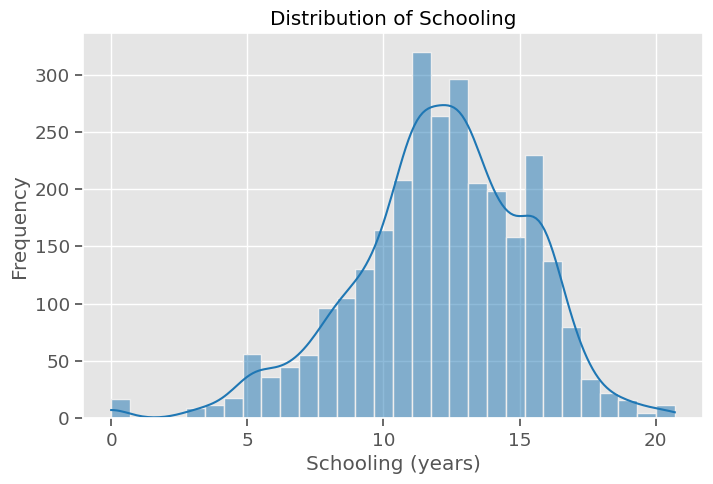

In [22]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Schooling'].dropna(), bins=30, kde=True)
plt.title('Distribution of Schooling')
plt.xlabel('Schooling (years)')
plt.ylabel('Frequency')
plt.show()

In [23]:
countries_without_edu = df[df['Schooling'] < 2]['Country'].unique()

In [24]:
countries_without_edu

array(['Antigua and Barbuda', 'South Sudan'], dtype=object)

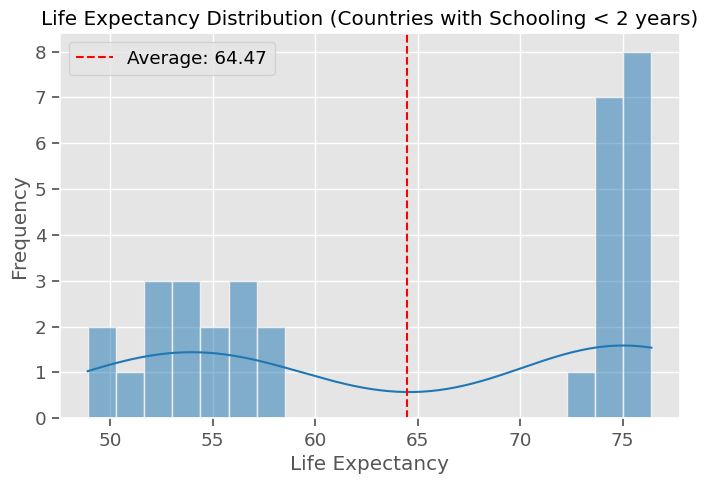

In [25]:
plt.figure(figsize=(8, 5))
life_exp = df[df['Country'].isin(countries_without_edu)]['Life expectancy '].dropna()
sns.histplot(life_exp, bins=20, kde=True)
plt.axvline(life_exp.mean(), color='red', linestyle='--', label=f'Average: {life_exp.mean():.2f}')
plt.title('Life Expectancy Distribution (Countries with Schooling < 2 years)')
plt.xlabel('Life Expectancy')
plt.ylabel('Frequency')
plt.legend()
plt.show()

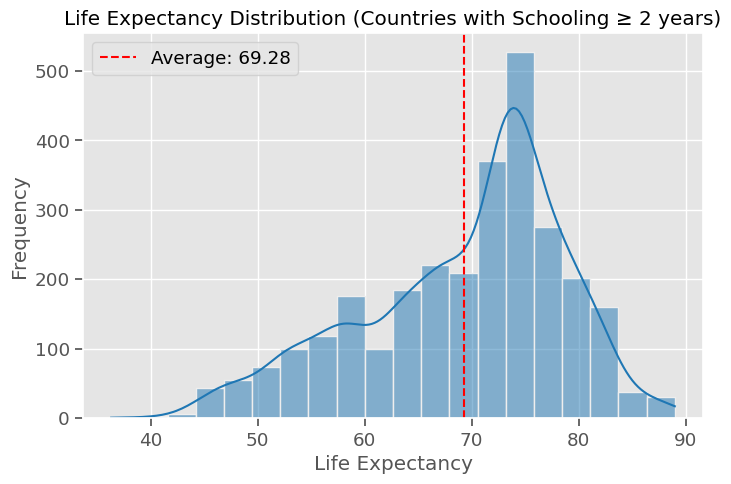

In [26]:
plt.figure(figsize=(8, 5))
life_exp_non_low_edu = df[~df['Country'].isin(countries_without_edu)]['Life expectancy '].dropna()
sns.histplot(life_exp_non_low_edu, bins=20, kde=True)
plt.axvline(life_exp_non_low_edu.mean(), color='red', linestyle='--', label=f'Average: {life_exp_non_low_edu.mean():.2f}')
plt.title('Life Expectancy Distribution (Countries with Schooling ≥ 2 years)')
plt.xlabel('Life Expectancy')
plt.ylabel('Frequency')
plt.legend()
plt.show()

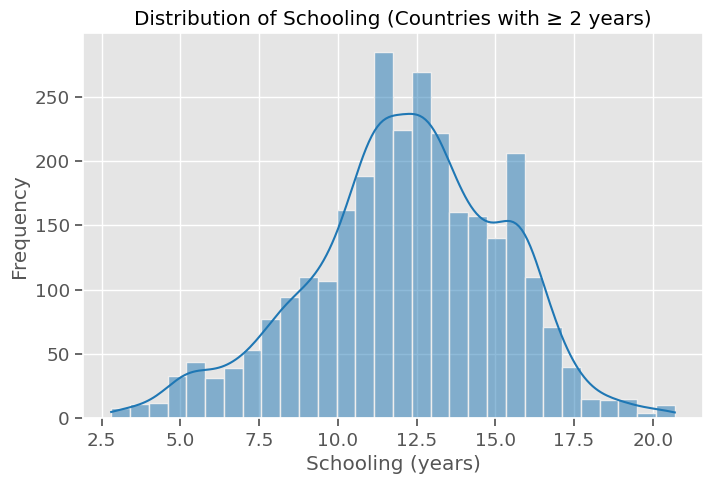

In [27]:
df_with_edu = df[df['Schooling'] >= 2]
plt.figure(figsize=(8, 5))
sns.histplot(df_with_edu['Schooling'], bins=30, kde=True)
plt.title('Distribution of Schooling (Countries with ≥ 2 years)')
plt.xlabel('Schooling (years)')
plt.ylabel('Frequency')
plt.show()

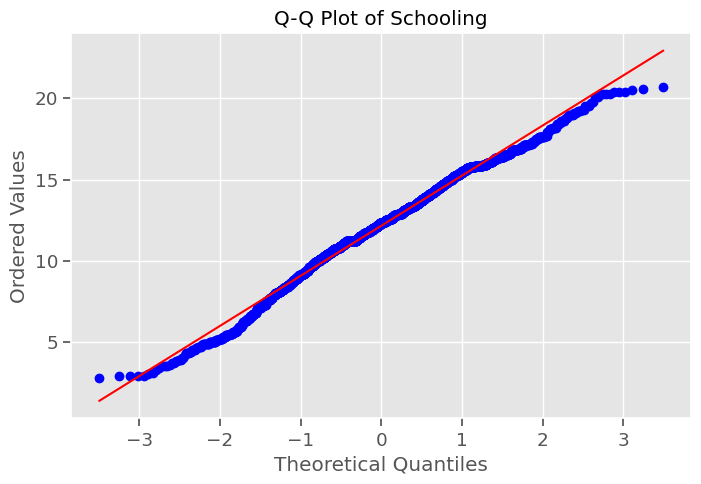

In [28]:
import scipy.stats as stats

schooling_data = df_with_edu['Schooling'].dropna()
plt.figure(figsize=(8, 5))
stats.probplot(schooling_data, dist="norm", plot=plt)
plt.title('Q-Q Plot of Schooling')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')
plt.show()

In [29]:
ks_stat, ks_p = stats.kstest(schooling_data, 'norm', args=(schooling_data.mean(), schooling_data.std()))
print(f"KS test statistic: {ks_stat}, p-value: {ks_p}")

shapiro_stat, shapiro_p = stats.shapiro(schooling_data)
print(f"Shapiro-Wilk test statistic: {shapiro_stat}, p-value: {shapiro_p}")

KS test statistic: 0.04581796581055858, p-value: 9.499851191054039e-06
Shapiro-Wilk test statistic: 0.9911781780816322, p-value: 2.1037382200474946e-12


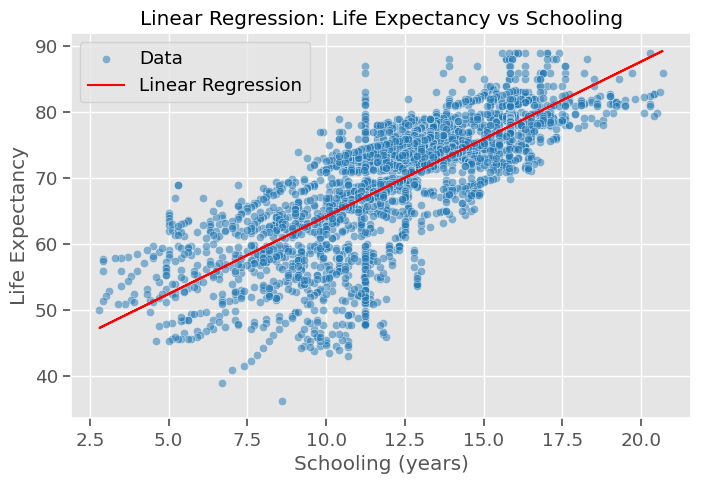

In [30]:
from sklearn.linear_model import LinearRegression

X = df_with_edu[['Schooling']].dropna()
y = df_with_edu.loc[X.index, 'Life expectancy ']
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X['Schooling'], y=y, alpha=0.5, label='Data')
plt.plot(X['Schooling'], y_pred, color='red', label='Linear Regression')
plt.title('Linear Regression: Life Expectancy vs Schooling')
plt.xlabel('Schooling (years)')
plt.ylabel('Life Expectancy')
plt.legend()
plt.show()

## Status

In [31]:
df['Status'] = df['Status'].map({'Developing': 0, 'Developed': 1})

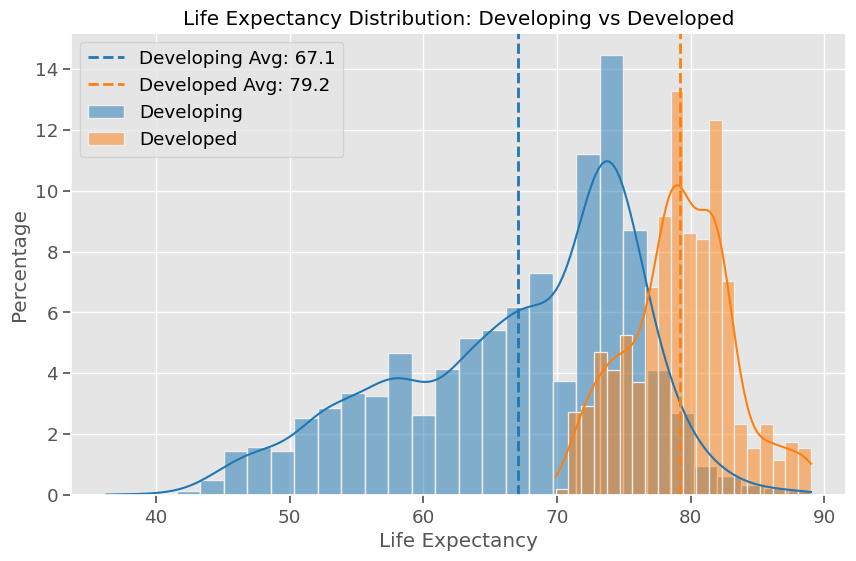

In [32]:
plt.figure(figsize=(10, 6))
sns.histplot(
    df[df['Status'] == 0]['Life expectancy '],
    bins=30, kde=True, color='tab:blue', label='Developing', stat="percent"
)
sns.histplot(
    df[df['Status'] == 1]['Life expectancy '],
    bins=20, kde=True, color='tab:orange', label='Developed', stat="percent"
)
life_exp_developing = df[df['Status'] == 0]['Life expectancy '].dropna()
life_exp_developed = df[df['Status'] == 1]['Life expectancy '].dropna()
plt.axvline(life_exp_developing.mean(), color='tab:blue', linestyle='--', linewidth=2, label=f'Developing Avg: {life_exp_developing.mean():.1f}')
plt.axvline(life_exp_developed.mean(), color='tab:orange', linestyle='--', linewidth=2, label=f'Developed Avg: {life_exp_developed.mean():.1f}')
plt.title('Life Expectancy Distribution: Developing vs Developed')
plt.xlabel('Life Expectancy')
plt.ylabel('Percentage')
plt.legend()
plt.show()


In [33]:
# Extract life expectancy for developing and developed countries
life_exp_developing = df_with_edu[df_with_edu['Status'] == 'Developing']['Life expectancy '].dropna()
life_exp_developed = df_with_edu[df_with_edu['Status'] == 'Developed']['Life expectancy '].dropna()

# Kolmogorov-Smirnov test
ks_stat_dev, ks_p_dev = stats.kstest(
    (life_exp_developing - life_exp_developing.mean()) / life_exp_developing.std(), 'norm'
)
ks_stat_devp, ks_p_devp = stats.kstest(
    (life_exp_developed - life_exp_developed.mean()) / life_exp_developed.std(), 'norm'
)

# Shapiro-Wilk test
shapiro_stat_dev, shapiro_p_dev = stats.shapiro(life_exp_developing)
shapiro_stat_devp, shapiro_p_devp = stats.shapiro(life_exp_developed)

print("Developing countries:")
print(f"  KS test statistic: {ks_stat_dev}, p-value: {ks_p_dev}")
print(f"  Shapiro-Wilk test statistic: {shapiro_stat_dev}, p-value: {shapiro_p_dev}")

print("\nDeveloped countries:")
print(f"  KS test statistic: {ks_stat_devp}, p-value: {ks_p_devp}")
print(f"  Shapiro-Wilk test statistic: {shapiro_stat_devp}, p-value: {shapiro_p_devp}")

Developing countries:
  KS test statistic: 0.12536816326166877, p-value: 2.521563752107099e-33
  Shapiro-Wilk test statistic: 0.9503647261962926, p-value: 9.142229361608661e-28

Developed countries:
  KS test statistic: 0.061451776975482986, p-value: 0.040099587720633934
  Shapiro-Wilk test statistic: 0.9844039770185479, p-value: 2.6709756222650866e-05


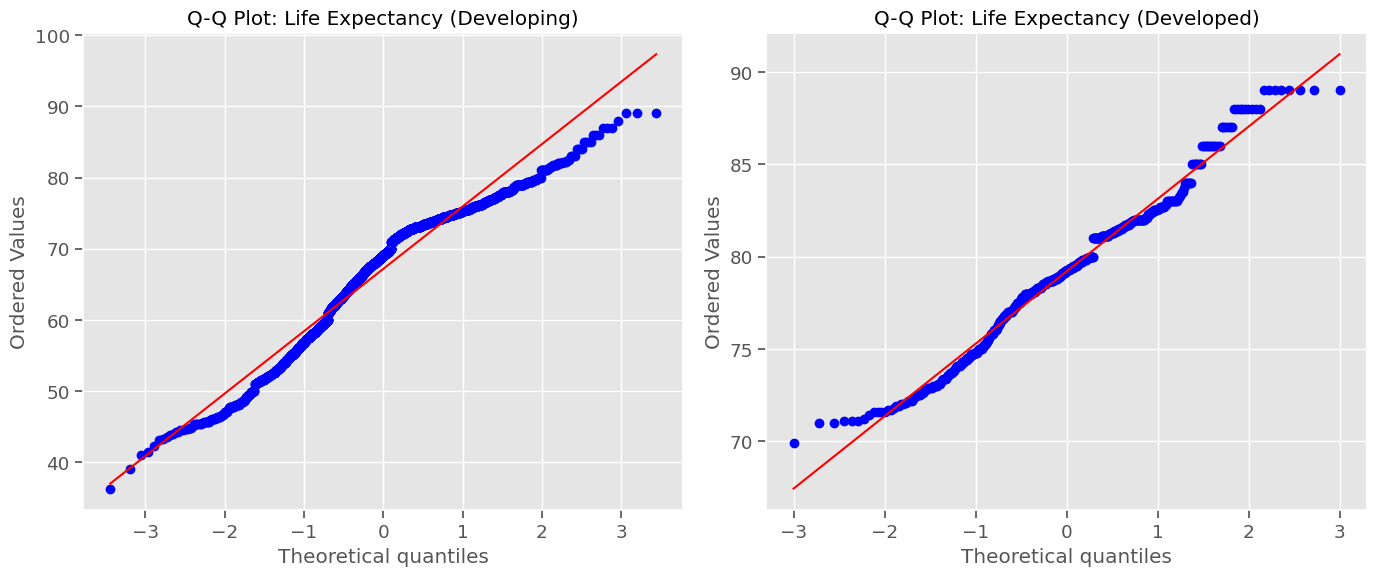

In [34]:
# Q-Q plots for life expectancy in developing and developed countries
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
stats.probplot(life_exp_developing, dist="norm", plot=plt)
plt.title('Q-Q Plot: Life Expectancy (Developing)')

plt.subplot(1, 2, 2)
stats.probplot(life_exp_developed, dist="norm", plot=plt)
plt.title('Q-Q Plot: Life Expectancy (Developed)')

plt.tight_layout()
plt.show()

In [35]:
from scipy.stats import mannwhitneyu

life_exp_developing = df_with_edu[df_with_edu['Status'] == 'Developing']['Life expectancy '].dropna()
life_exp_developed = df_with_edu[df_with_edu['Status'] == 'Developed']['Life expectancy '].dropna()
u_stat, u_p = mannwhitneyu(life_exp_developing, life_exp_developed, alternative='two-sided')
print(f"Mann-Whitney U statistic: {u_stat}, p-value: {u_p}")

Mann-Whitney U statistic: 105103.0, p-value: 4.4658876079818503e-191


## GDP

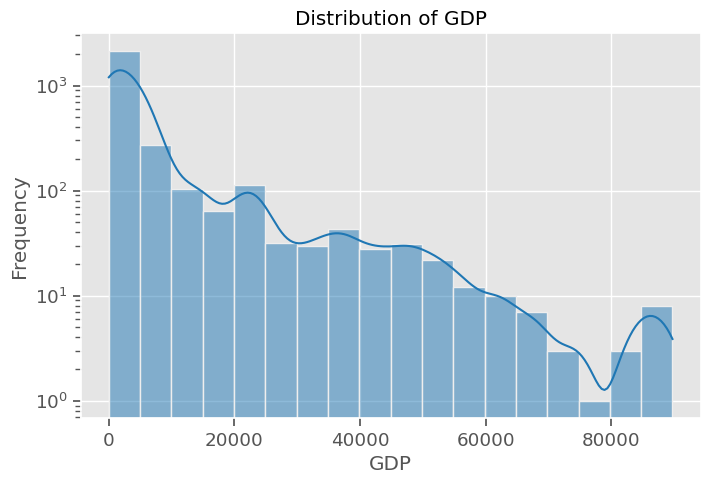

In [36]:
plt.figure(figsize=(8, 5))
sns.histplot(df[df['GDP'] < 100000]['GDP'].dropna(), bins=18, kde=True)
plt.title('Distribution of GDP')
plt.xlabel('GDP')
# plt.xscale('log')
plt.yscale('log')
plt.ylabel('Frequency')
plt.show()

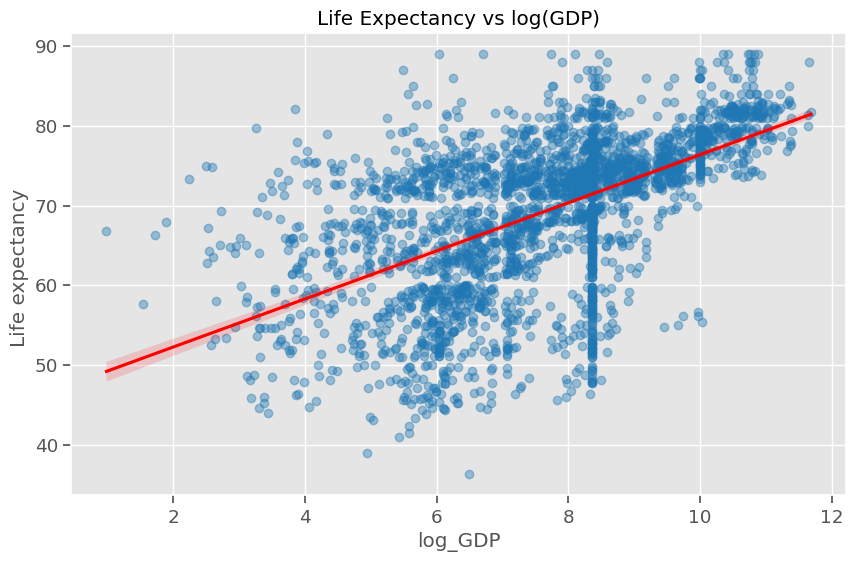

In [37]:
df_gdp = df[['GDP', 'Life expectancy ']].dropna()
df_gdp['log_GDP'] = np.log1p(df_gdp['GDP'])

sns.regplot(data=df_gdp, x='log_GDP', y='Life expectancy ', scatter_kws={'alpha':0.4}, line_kws={'color':'red'})
plt.title("Life Expectancy vs log(GDP)")
plt.show()


In [38]:
(df['GDP'] > 100000).sum()

4

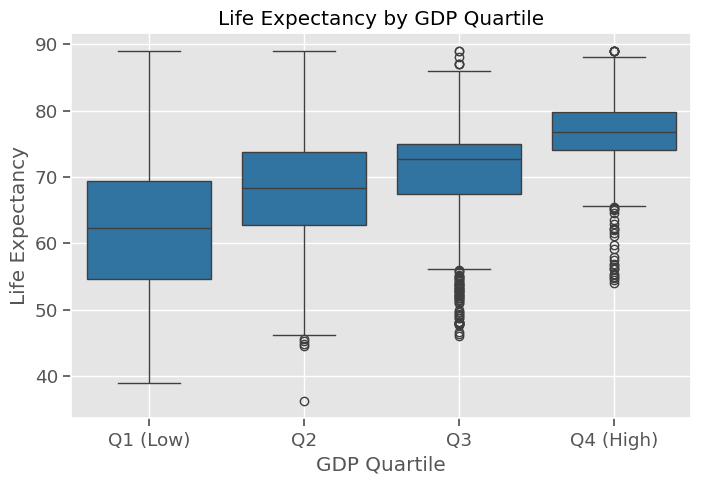

Mann-Whitney U test: U = 47165.500, p = 0.0000


In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu

df_gdp = df[['GDP', 'Life expectancy ']].dropna()
df_gdp['GDP_group'] = pd.qcut(df_gdp['GDP'], q=4, labels=['Q1 (Low)', 'Q2', 'Q3', 'Q4 (High)'])

# Plot
plt.figure(figsize=(8,5))
sns.boxplot(data=df_gdp, x='GDP_group', y='Life expectancy ')
plt.title("Life Expectancy by GDP Quartile")
plt.xlabel("GDP Quartile")
plt.ylabel("Life Expectancy")
plt.grid(True)
plt.show()

# Mann-Whitney U test: top vs bottom
group_low = df_gdp[df_gdp['GDP_group'] == 'Q1 (Low)']['Life expectancy ']
group_high = df_gdp[df_gdp['GDP_group'] == 'Q4 (High)']['Life expectancy ']
stat, p = mannwhitneyu(group_low, group_high, alternative='two-sided')
print(f"Mann-Whitney U test: U = {stat:.3f}, p = {p:.4f}")

## Alcohol

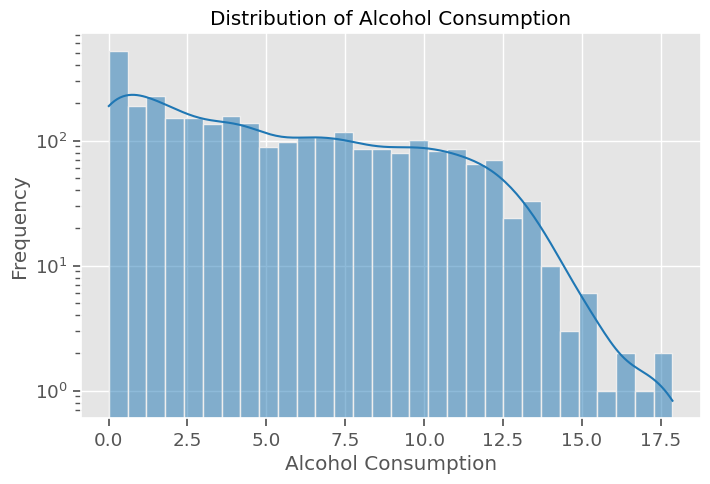

In [43]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Alcohol'].dropna(), bins=30, kde=True)
plt.title('Distribution of Alcohol Consumption')
plt.xlabel('Alcohol Consumption')
plt.yscale('log')
plt.ylabel('Frequency')
plt.show()

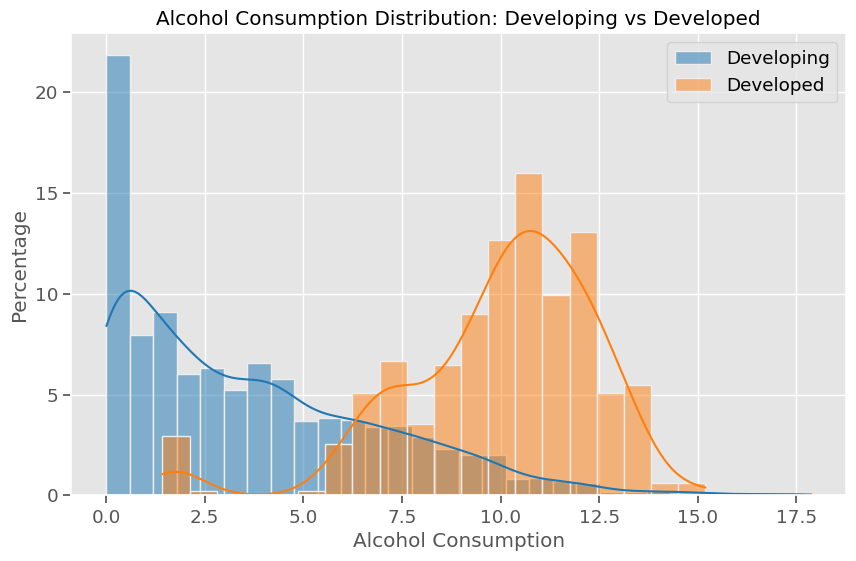

In [44]:
plt.figure(figsize=(10, 6))
sns.histplot(
    df_with_edu[df_with_edu['Status'] == 'Developing']['Alcohol'].dropna(),
    bins=30, kde=True, color='tab:blue', label='Developing', stat="percent"
)
sns.histplot(
    df_with_edu[df_with_edu['Status'] == 'Developed']['Alcohol'].dropna(),
    bins=20, kde=True, color='tab:orange', label='Developed', stat="percent"
)
plt.title('Alcohol Consumption Distribution: Developing vs Developed')
plt.xlabel('Alcohol Consumption')
plt.ylabel('Percentage')
plt.legend()
plt.show()

In [45]:
from scipy.stats import spearmanr

cols = ['Alcohol', 'GDP', 'Schooling', 'Income composition of resources']
df_corr = df[cols].dropna()

for var in ['GDP', 'Schooling', 'Income composition of resources']:
    corr, p = spearmanr(df_corr['Alcohol'], df_corr[var])
    print(f"Spearman correlation between Alcohol and {var}: r = {corr:.3f}, p = {p:.4f}")

Spearman correlation between Alcohol and GDP: r = 0.436, p = 0.0000
Spearman correlation between Alcohol and Schooling: r = 0.556, p = 0.0000
Spearman correlation between Alcohol and Income composition of resources: r = 0.521, p = 0.0000


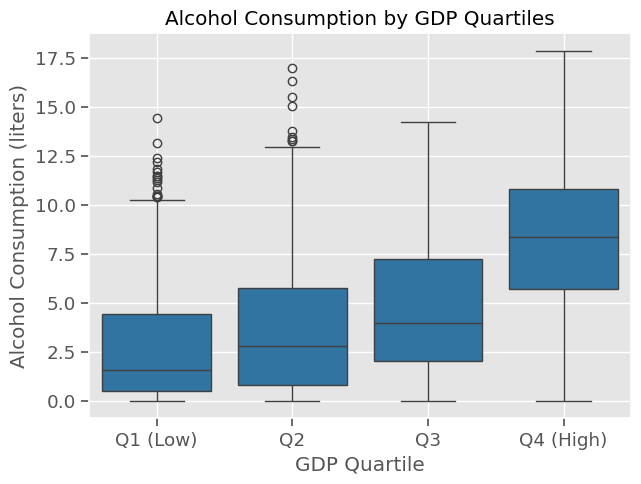

Mann-Whitney U Test (Low vs High GDP): U = 96194.500, p = 0.000000


In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
import pandas as pd

df_gdp = df[['Alcohol', 'GDP']].dropna()
df_gdp['GDP_group'] = pd.qcut(df_gdp['GDP'], 4, labels=["Q1 (Low)", "Q2", "Q3", "Q4 (High)"])

# Boxplot
plt.figure(figsize=(7,5))
sns.boxplot(data=df_gdp, x='GDP_group', y='Alcohol')
plt.title("Alcohol Consumption by GDP Quartiles")
plt.xlabel("GDP Quartile")
plt.ylabel("Alcohol Consumption (liters)")
plt.grid(True)
plt.show()

# Mann-Whitney Test (Q1 vs Q4)
low = df_gdp[df_gdp['GDP_group'] == 'Q1 (Low)']['Alcohol']
high = df_gdp[df_gdp['GDP_group'] == 'Q4 (High)']['Alcohol']

stat, p = mannwhitneyu(low, high, alternative='two-sided')
print(f"Mann-Whitney U Test (Low vs High GDP): U = {stat:.3f}, p = {p:.6f}")

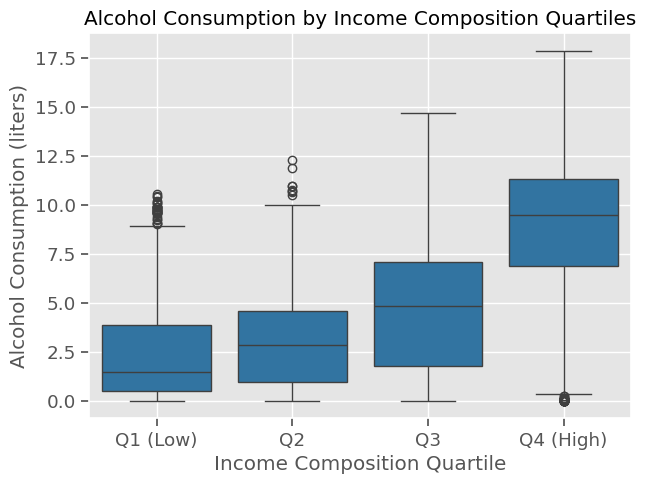

Mann-Whitney U Test (Low vs High Income Composition): U = 74646.000, p = 0.000000


In [47]:
df_income = df[['Alcohol', 'Income composition of resources']].dropna()
df_income['Income_group'] = pd.qcut(df_income['Income composition of resources'], 4, labels=["Q1 (Low)", "Q2", "Q3", "Q4 (High)"])

# Boxplot
plt.figure(figsize=(7,5))
sns.boxplot(data=df_income, x='Income_group', y='Alcohol')
plt.title("Alcohol Consumption by Income Composition Quartiles")
plt.xlabel("Income Composition Quartile")
plt.ylabel("Alcohol Consumption (liters)")
plt.grid(True)
plt.show()

# Mann-Whitney Test (Q1 vs Q4)
low = df_income[df_income['Income_group'] == 'Q1 (Low)']['Alcohol']
high = df_income[df_income['Income_group'] == 'Q4 (High)']['Alcohol']

stat, p = mannwhitneyu(low, high, alternative='two-sided')
print(f"Mann-Whitney U Test (Low vs High Income Composition): U = {stat:.3f}, p = {p:.6f}")

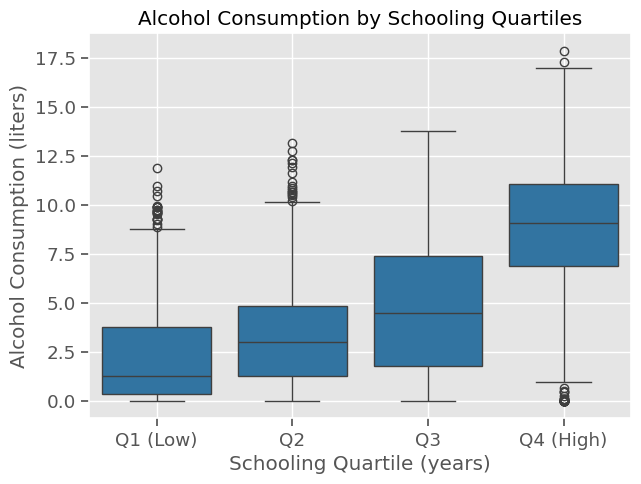

Mann-Whitney U Test (Low vs High Schooling): U = 63868.000, p = 0.000000


In [48]:
df_school = df[['Alcohol', 'Schooling']].dropna()
df_school['Schooling_group'] = pd.qcut(df_school['Schooling'], 4, labels=["Q1 (Low)", "Q2", "Q3", "Q4 (High)"])

# Boxplot
plt.figure(figsize=(7,5))
sns.boxplot(data=df_school, x='Schooling_group', y='Alcohol')
plt.title("Alcohol Consumption by Schooling Quartiles")
plt.xlabel("Schooling Quartile (years)")
plt.ylabel("Alcohol Consumption (liters)")
plt.grid(True)
plt.show()

# Mann-Whitney Test (Q1 vs Q4)
low = df_school[df_school['Schooling_group'] == 'Q1 (Low)']['Alcohol']
high = df_school[df_school['Schooling_group'] == 'Q4 (High)']['Alcohol']

stat, p = mannwhitneyu(low, high, alternative='two-sided')
print(f"Mann-Whitney U Test (Low vs High Schooling): U = {stat:.3f}, p = {p:.6f}")

In [49]:
from scipy.stats import spearmanr

df_corr = df[['Alcohol', 'Life expectancy ']].dropna()
corr, p = spearmanr(df_corr['Alcohol'], df_corr['Life expectancy '])
print(f"Spearman correlation between Alcohol and Life Expectancy: r = {corr:.3f}, p = {p:.4f}")

Spearman correlation between Alcohol and Life Expectancy: r = 0.436, p = 0.0000


In [50]:
import pandas as pd
from scipy.stats import mannwhitneyu

df_mw = df[['Alcohol', 'Life expectancy ']].dropna()
df_mw['Alcohol_group'] = pd.qcut(df_mw['Alcohol'], 4, labels=['Q1 (Low)', 'Q2', 'Q3', 'Q4 (High)'])

low = df_mw[df_mw['Alcohol_group'] == 'Q1 (Low)']['Life expectancy ']
high = df_mw[df_mw['Alcohol_group'] == 'Q4 (High)']['Life expectancy ']

stat, p = mannwhitneyu(low, high, alternative='two-sided')
print(f"Mann-Whitney U test (Low vs High Alcohol): U = {stat:.3f}, p = {p:.6f}")

Mann-Whitney U test (Low vs High Alcohol): U = 84101.500, p = 0.000000


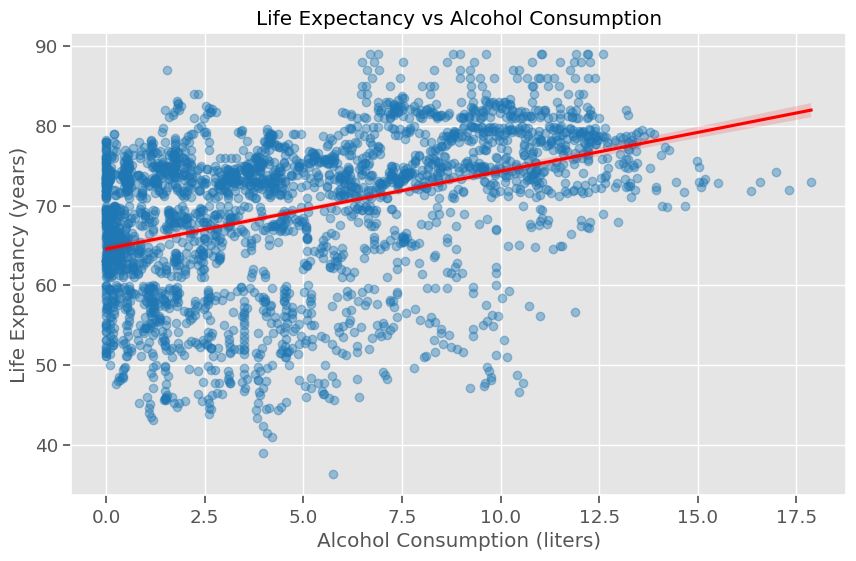

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.regplot(data=df_mw, x='Alcohol', y='Life expectancy ', scatter_kws={'alpha':0.4}, line_kws={'color':'red'})
plt.title("Life Expectancy vs Alcohol Consumption")
plt.xlabel("Alcohol Consumption (liters)")
plt.ylabel("Life Expectancy (years)")
plt.grid(True)
plt.show()

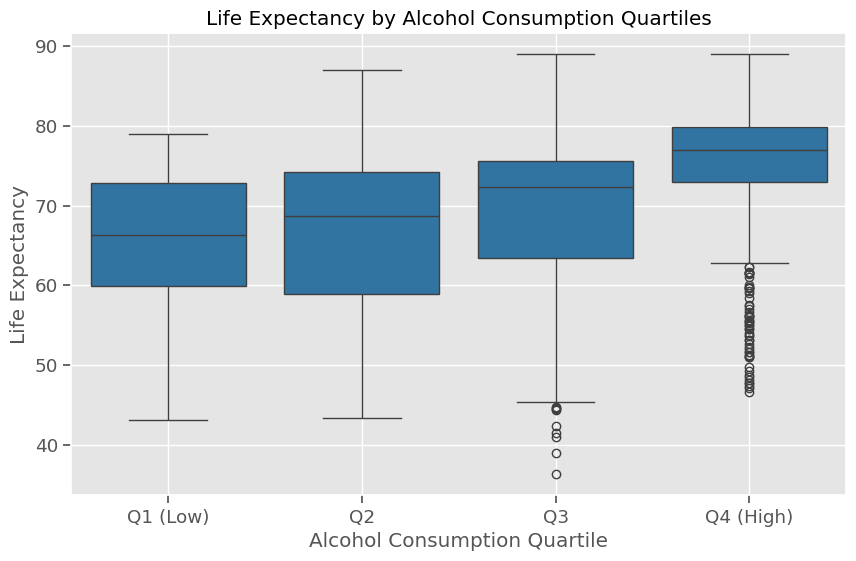

In [52]:
sns.boxplot(data=df_mw, x='Alcohol_group', y='Life expectancy ')
plt.title("Life Expectancy by Alcohol Consumption Quartiles")
plt.xlabel("Alcohol Consumption Quartile")
plt.ylabel("Life Expectancy")
plt.grid(True)
plt.show()

In [53]:
X.isnull().sum()

Schooling    0
dtype: int64

## Feature selection
We will use Linear Regression with Lasso regularization for selectimg important features

In [54]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LassoCV
from sklearn.feature_selection import RFE

Y = df['Life expectancy ']
X = df.drop(['Life expectancy '], axis=1).drop(['Year'], axis=1).select_dtypes(include=np.number)


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
scaler = StandardScaler()

Lasso chose 10 features and rejected 1.

Selected features:
['Status', 'Alcohol', 'percentage expenditure', ' BMI ', 'Total expenditure', 'GDP', 'Population', ' thinness  1-19 years', 'Income composition of resources', 'Schooling']


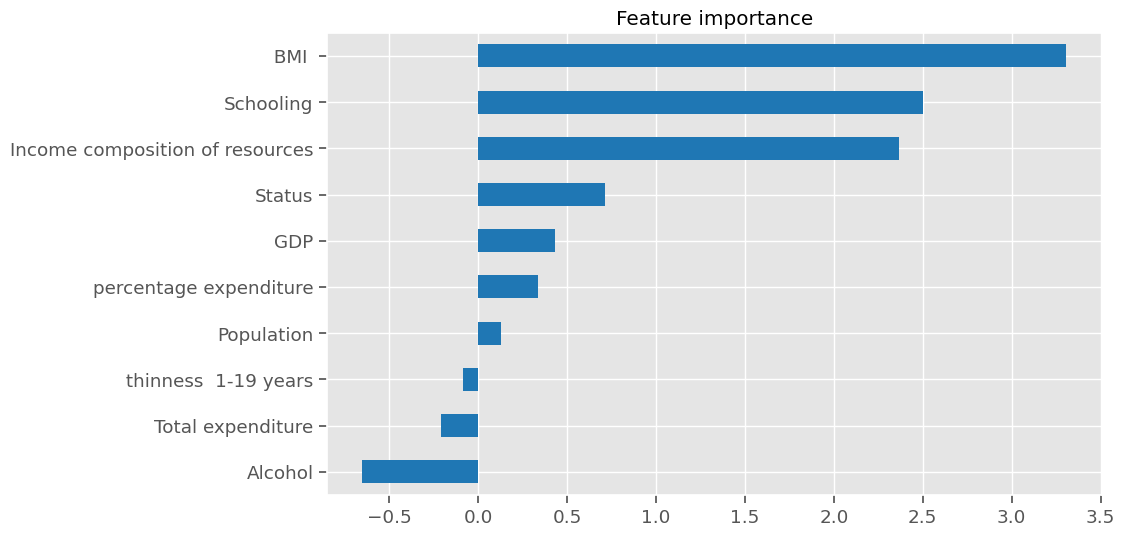

In [55]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
lasso = LassoCV(cv=5, random_state=42, max_iter=10000)

lasso.fit(X_train_scaled, y_train)

coef = pd.Series(lasso.coef_, index=X.columns)

print(f"Lasso chose {sum(coef != 0)} features and rejected {sum(coef == 0)}.")

selected_features_lasso = coef[coef != 0].index.tolist()
print("\nSelected features:")
print(selected_features_lasso)

plt.figure(figsize=(10, 6))
coef[coef != 0].sort_values().plot(kind='barh')
plt.title('Feature importance')
plt.show()


# Evaluating different ML models for data fitting


In [56]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [57]:
Y = df['Life expectancy ']
X = df[selected_features_lasso]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## Linear Regression

In [58]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

y_pred_linear = linear_model.predict(X_test)

mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(f"Mean Squared Error (MSE): {mse_linear:.2f}")
print(f"R-squared (R²): {r2_linear:.2f}")

print("\nModel Coefficients Analysis:")
coeffs = pd.Series(linear_model.coef_, index=selected_features_lasso)
print(coeffs)

Mean Squared Error (MSE): 27.15
R-squared (R²): 0.69

Model Coefficients Analysis:
Status                             2.146483e+00
Alcohol                           -2.040886e-01
percentage expenditure             1.951362e-04
 BMI                               1.899239e-01
Total expenditure                 -1.112441e-01
GDP                                3.143178e-05
Population                         3.900567e-09
 thinness  1-19 years             -3.612703e-02
Income composition of resources    1.186613e+01
Schooling                          7.900820e-01
dtype: float64


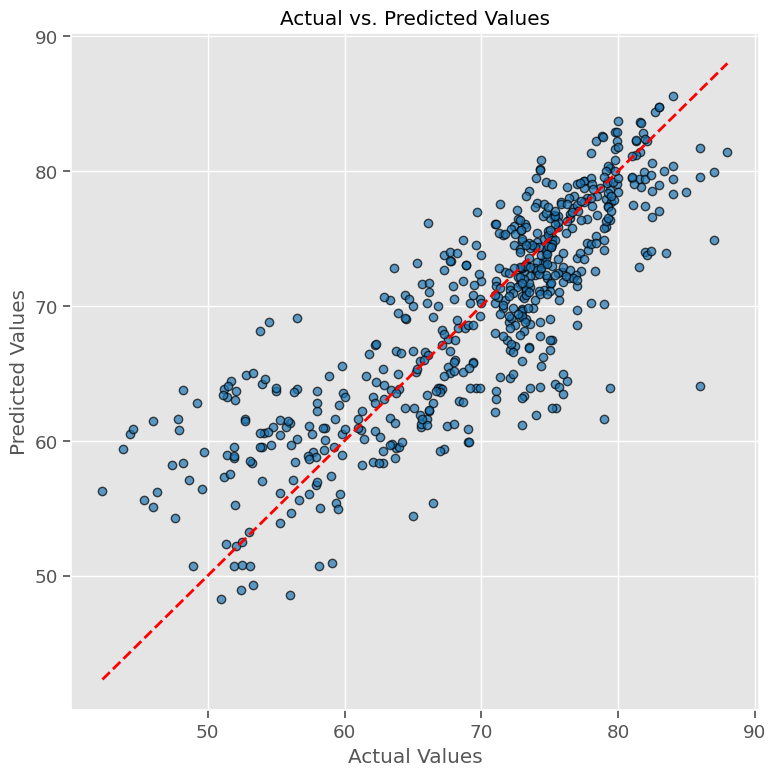

In [59]:
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred_linear, alpha=0.7, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.tight_layout()

## Support Vector Regression

In [60]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svr_model = SVR(kernel='rbf')
svr_model.fit(X_train_scaled, y_train)

y_pred_svr = svr_model.predict(X_test_scaled)

mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print(f"Mean Squared Error (MSE): {mse_svr:.2f}")
print(f"R-squared (R²): {r2_svr:.2f}")

Mean Squared Error (MSE): 17.96
R-squared (R²): 0.79


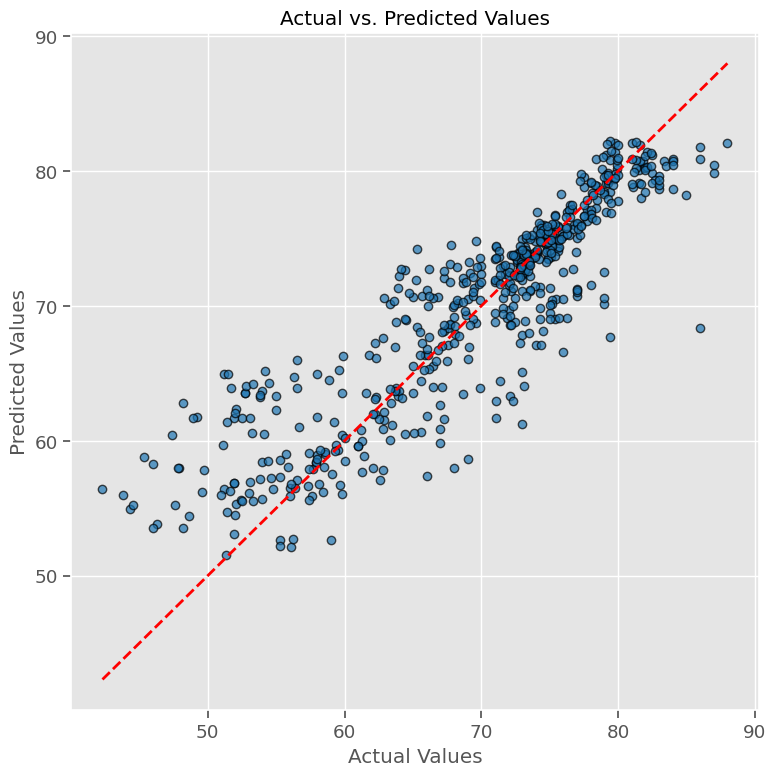

In [61]:
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred_svr, alpha=0.7, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.tight_layout()

## Decision Tree Regression

In [62]:
tree_model = DecisionTreeRegressor(max_depth=5, random_state=42)
tree_model.fit(X_train, y_train)

y_pred_tree = tree_model.predict(X_test)

mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print(f"Mean Squared Error (MSE): {mse_tree:.2f}")
print(f"R-squared (R²): {r2_tree:.2f}")


Mean Squared Error (MSE): 16.28
R-squared (R²): 0.81


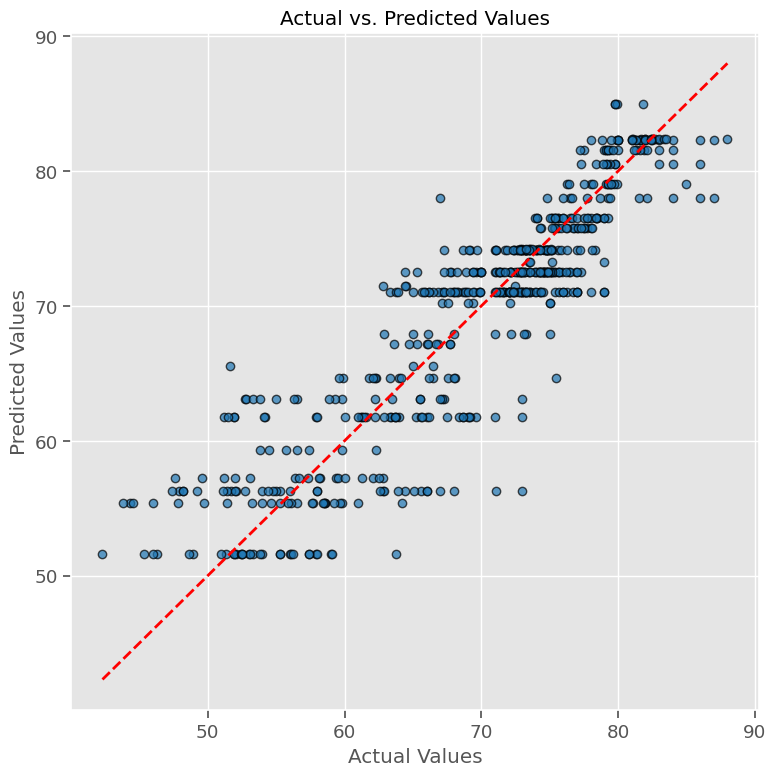

In [63]:
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred_tree, alpha=0.7, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.tight_layout()

## Best model
Undoubtedly Decision Trees Regression has the lowest MSE and highest R^2 which makes it the best predictor

Decision tree features importance:
Income composition of resources    0.831306
 BMI                               0.065265
Alcohol                            0.053905
 thinness  1-19 years              0.031411
GDP                                0.007488
Total expenditure                  0.005032
Population                         0.004329
Schooling                          0.001265
Status                             0.000000
percentage expenditure             0.000000
dtype: float64


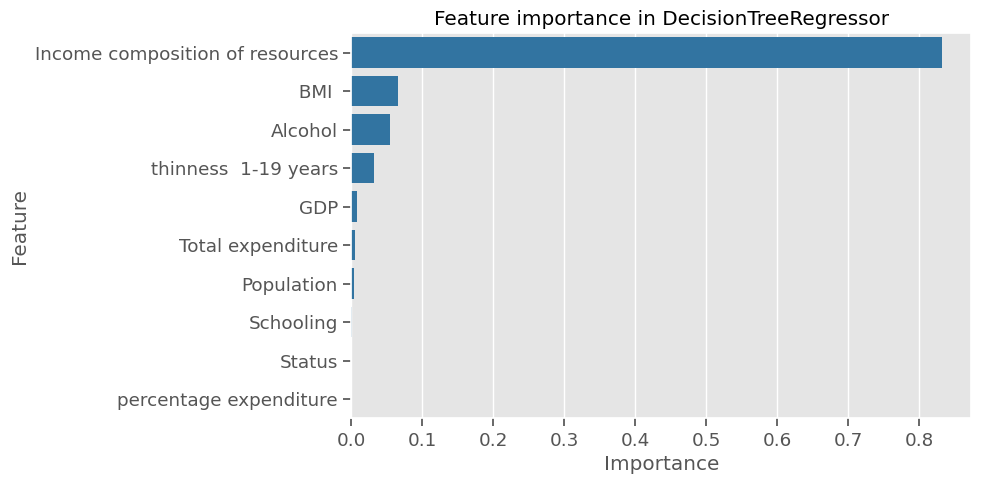

In [64]:
importances = tree_model.feature_importances_

feature_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)

print("Decision tree features importance:")
print(feature_importances)

plt.figure(figsize=(8, 5))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title('Feature importance in DecisionTreeRegressor')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()



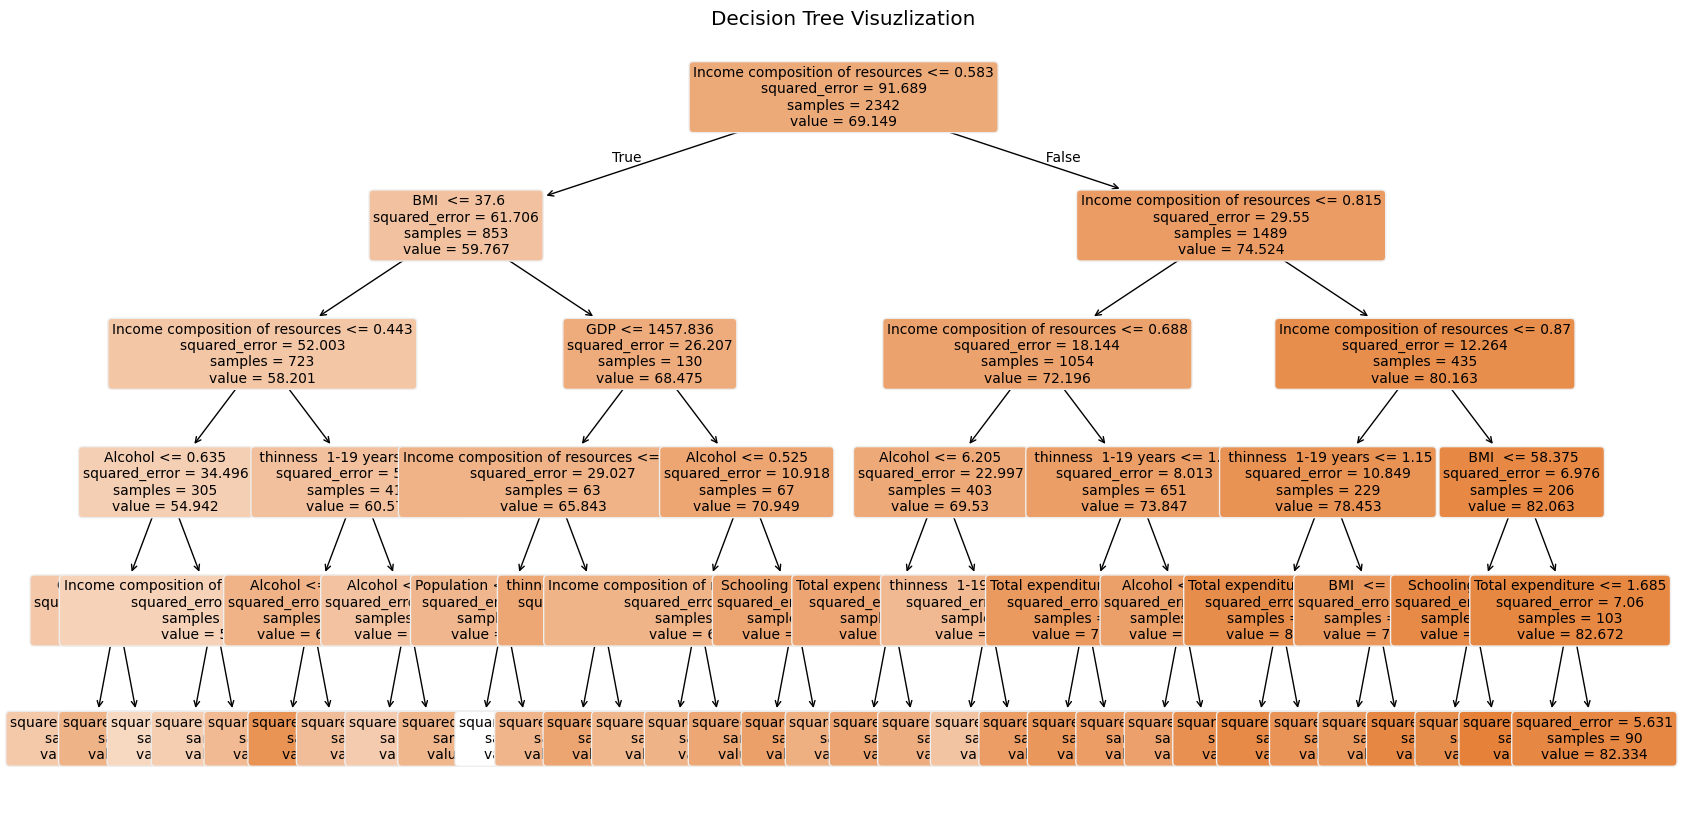

In [65]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(tree_model,
          feature_names=X.columns,
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Decision Tree Visuzlization")
plt.show()
